In [1]:
import numpy as np
import matplotlib.pyplot as plt

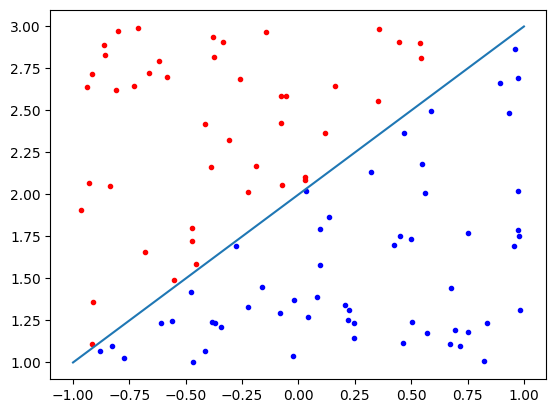

In [2]:
Slope = 1
Intercept = 2

NumberPoints = 100
NoiseVariance = 0.1

Xmin = -1
Xmax =  1

Ymin = Slope * Xmin + Intercept
Ymax = Slope * Xmax + Intercept

PointX = (Xmax-Xmin) * np.random.rand( NumberPoints , 1 ) + Xmin
PointY = (Ymax-Ymin) * np.random.rand( NumberPoints , 1 ) + Ymin

LineFunction = PointY - ( Slope * PointX + Intercept )
PointClass = np.sign( LineFunction )

for i in range( NumberPoints ):
    if PointClass[i]==1 :
        plt.plot( PointX[i] , PointY[i] , '.r' )
    else :
        plt.plot( PointX[i] , PointY[i] , '.b' )

plt.plot( [Xmin,Xmax] , [Ymin,Ymax] )
plt.show()

Error =  40.0 Estimated Slope =  0.0076116629176474476 Estimated Intercept 0.04
Error =  48.0 Estimated Slope =  0.02428061170877846 Estimated Intercept 0.088
Error =  28.0 Estimated Slope =  0.03964485982555369 Estimated Intercept 0.11599999999999999
Error =  48.0 Estimated Slope =  0.05383482399086665 Estimated Intercept 0.16399999999999998
Error =  44.0 Estimated Slope =  0.06739033063255762 Estimated Intercept 0.20799999999999996
Error =  40.0 Estimated Slope =  0.07561533718387622 Estimated Intercept 0.24799999999999997
Error =  44.0 Estimated Slope =  0.08412099064026196 Estimated Intercept 0.292
Error =  52.0 Estimated Slope =  0.10567282686301246 Estimated Intercept 0.344
Error =  48.0 Estimated Slope =  0.12222158632474507 Estimated Intercept 0.39199999999999996
Error =  40.0 Estimated Slope =  0.13772625236736097 Estimated Intercept 0.43199999999999994
Error =  56.0 Estimated Slope =  0.15198889992478437 Estimated Intercept 0.48799999999999993
Error =  44.0 Estimated Slope = 

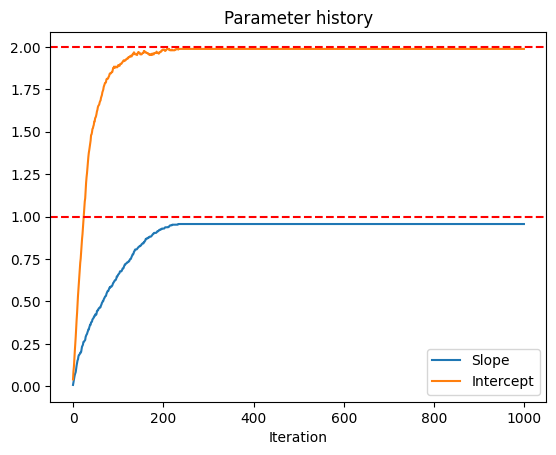

In [3]:
SlopeEstimate = 0
InterceptEstimate = 0

NumberIterations = 1000
LearningRate = 0.001
BatchSize = 20

SlopeHistory = []
InterceptHistory = []

for It in range( NumberIterations ):
    Index = np.random.permutation( len(PointX) )

    BatchPointX = PointX[ Index[1:BatchSize] ]
    BatchPointY = PointY[ Index[1:BatchSize] ]

    BatchPointClass = PointClass[ Index[1:BatchSize] ]
    
    LineFunctionEstimate = BatchPointY - ( SlopeEstimate * BatchPointX + InterceptEstimate )
    PointClassEstimate = np.sign( LineFunctionEstimate )

    Error = np.sum( ( BatchPointClass - PointClassEstimate )**2 )
    dError_dSlope = np.sum( 2 * ( BatchPointClass - PointClassEstimate ) * BatchPointX )
    dError_dIntercept = np.sum( 2 * ( BatchPointClass - PointClassEstimate ) )

    SlopeEstimate = SlopeEstimate - LearningRate * dError_dSlope
    InterceptEstimate = InterceptEstimate - LearningRate * dError_dIntercept

    SlopeHistory = np.append( SlopeHistory , SlopeEstimate )
    InterceptHistory = np.append( InterceptHistory , InterceptEstimate )

    print("Error = ",Error, "Estimated Slope = ",SlopeEstimate, "Estimated Intercept",InterceptEstimate) 

plt.plot( SlopeHistory )
plt.plot( InterceptHistory )
plt.title( 'Parameter history' )
plt.xlabel( 'Iteration' )
plt.legend( ['Slope' , 'Intercept'] )
plt.axhline( y=Slope , color='r' , linestyle='--' )
plt.axhline( y=Intercept , color='r' , linestyle='--' )
plt.show()

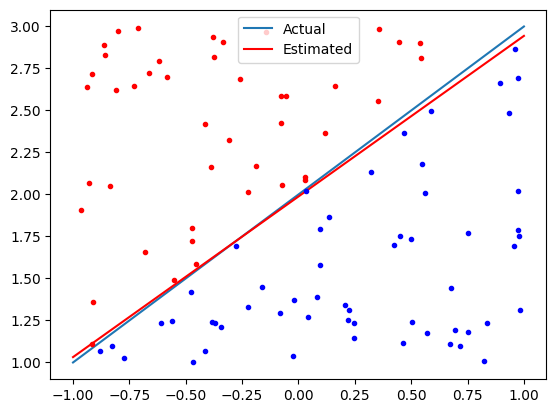

In [6]:
LineFunctionEstimate = PointY - ( SlopeEstimate * PointX + InterceptEstimate )
PointClassEstimate = np.sign( LineFunctionEstimate )

YminEstimate = SlopeEstimate * Xmin + InterceptEstimate
YmaxEstimate = SlopeEstimate * Xmax + InterceptEstimate

plt.plot( [Xmin,Xmax] , [Ymin,Ymax] )
plt.plot( [Xmin,Xmax] , [YminEstimate,YmaxEstimate] , 'r' )
plt.legend( ["Actual","Estimated"])

for i in range( NumberPoints ):
    if PointClassEstimate[i]==1 :
        plt.plot( PointX[i] , PointY[i] , '.r' )
    else :
        plt.plot( PointX[i] , PointY[i] , '.b' )

plt.show()